<a href="https://colab.research.google.com/github/ilanb1/DSP-IP/blob/main/face_swapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load celebA dataset

In [ ]:
!pip3 install "hub[all]" 
import hub

In [2]:
#downloading only the test set (which is also already too big)
ds = hub.load("hub://activeloop/celeb-a-test")

hub://activeloop/celeb-a-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-test


In [5]:
print(f" number of images: {len(ds)}")

 number of images: 19962


In [25]:
#using only the first 300 images:
images_list = ds.images[:300].numpy(aslist=True)

In [10]:
import matplotlib.pyplot as plt
import cv2
import random

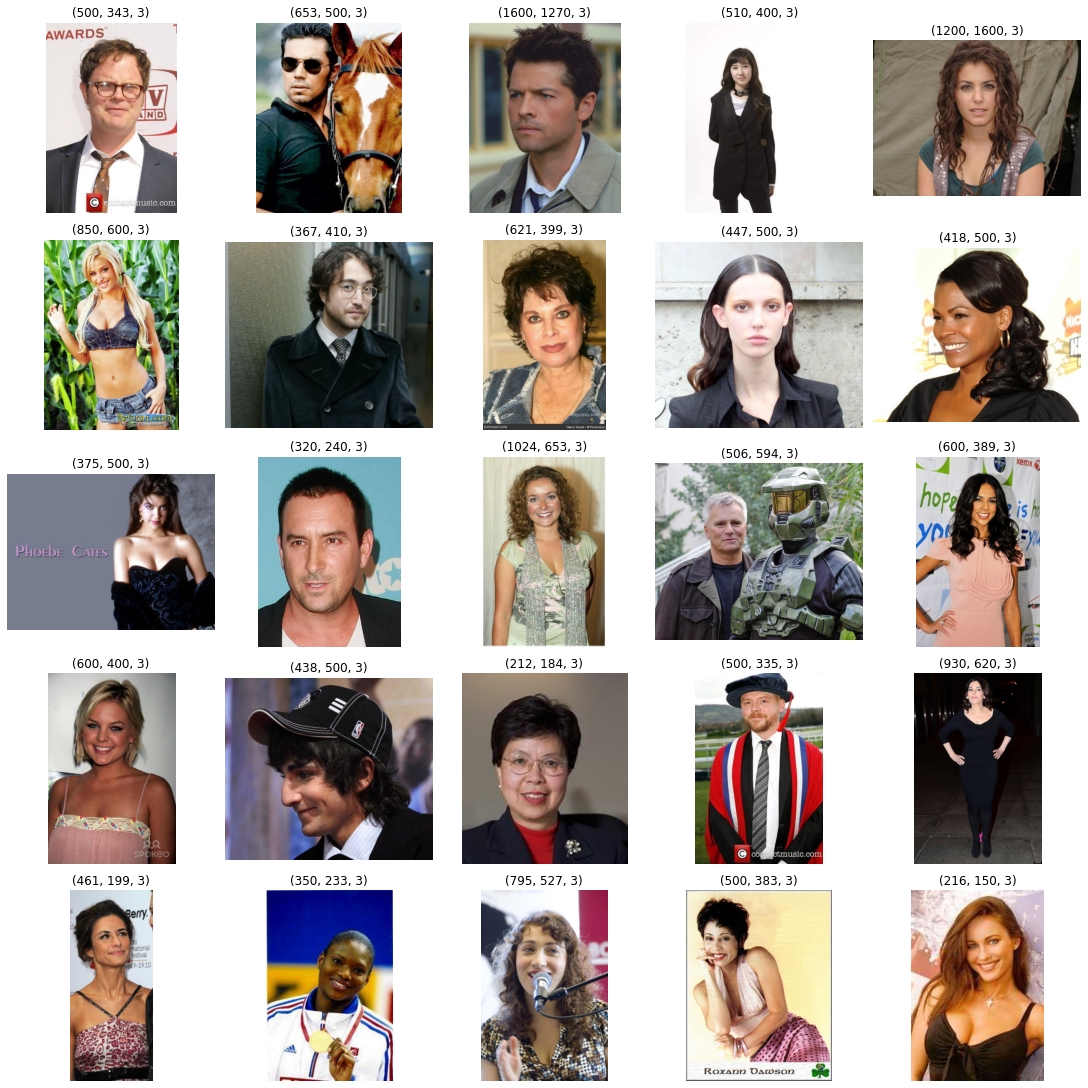

In [26]:
#exploring the images:

fig, ax = plt.subplots(5, 5,constrained_layout=True, figsize=(15,15))

for index, image in enumerate(images_list[:25]):
  ax[index//5 , index%5].imshow(image)
  ax[index//5 , index%5].set_title(image.shape)
  ax[index//5 , index%5].axis("off")



testing the cv2 funtion of detecting faces:

In [50]:
def show_face(image):
  
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  img = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.2, 4)

  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  
  return img

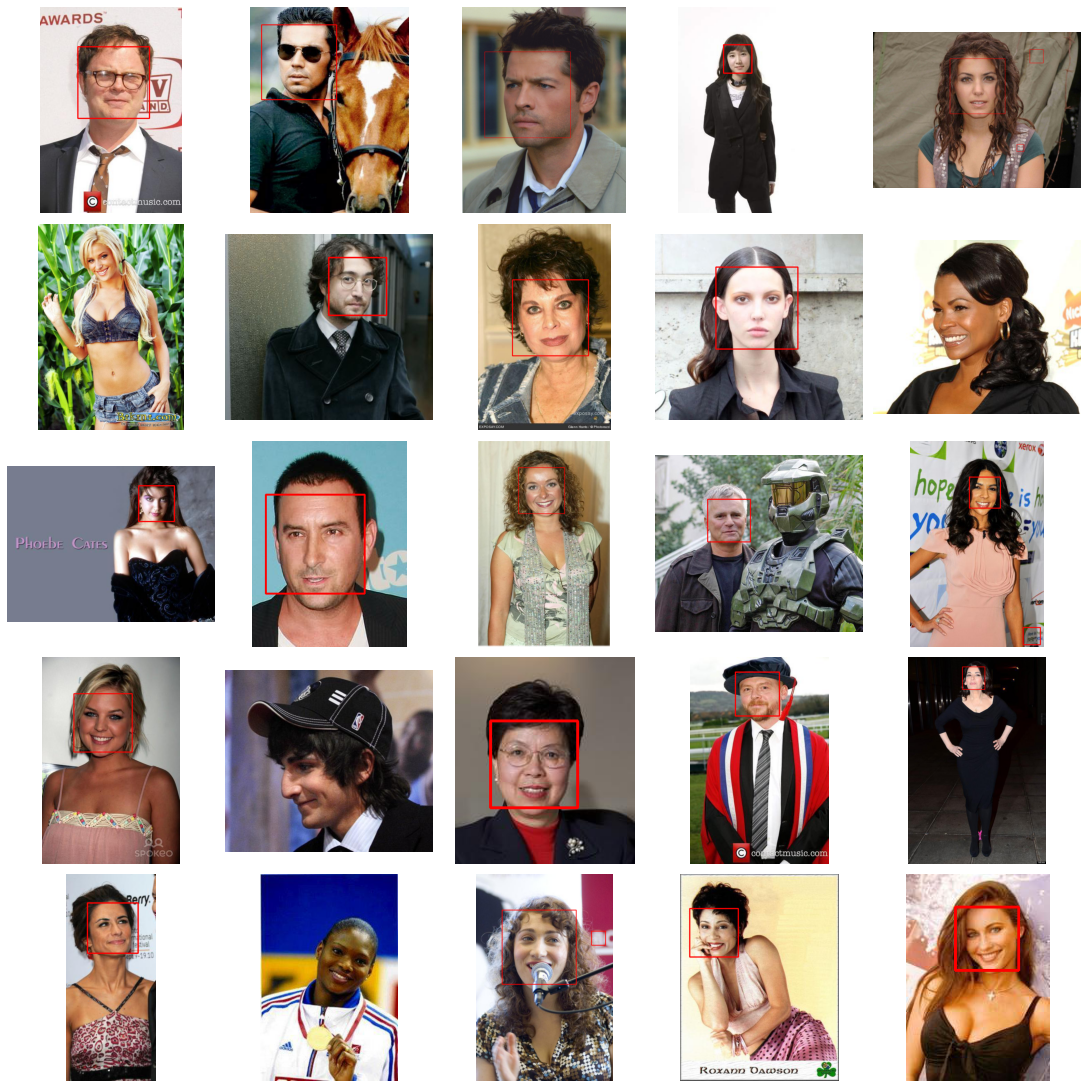

In [54]:
fig, ax = plt.subplots(5, 5,constrained_layout=True, figsize=(15,15))

for index, image in enumerate(images_list[:25]):
  ax[index//5 , index%5].imshow(show_face(image))
  ax[index//5 , index%5].axis("off")

Face swapping (simplest approach - pasting the rectangles after resizing them)

In [63]:
def swap_faces(image1 , image2):
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

  faces1 = face_cascade.detectMultiScale(gray1, 1.1, 4)
  faces2 = face_cascade.detectMultiScale(gray2, 1.1, 4)

  #if we found too many faces or no faces at all in one of the images, return false
  if len(faces1)!=1 or len(faces2)!=1:
    return False , _

  [(x1 , y1 ,w1 ,h1)] = faces1
  [(x2 , y2 ,w2 ,h2)] = faces2
  
  #the actual faces:
  face1 =   image1[y1 : y1+h1  , x1 : x1+w1].copy()
  face2 =   image2[y2 : y2+h2  ,  x2 : x2+w2].copy()

  #resizing each face so it will fit to the other image
  new_face1 = cv2.resize(face2, dsize=(w1, h1), interpolation=cv2.INTER_CUBIC)
  new_face2 = cv2.resize(face1, dsize=(w2, h2), interpolation=cv2.INTER_CUBIC)

  img1 = image1.copy()
  img2 = image2.copy()

  #pasting the new faces in the images
  img1[y1 : y1+h1 , x1 : x1+ w1 ] = new_face1
  img2[y2 : y2+h2 , x2 : x2+ w2 ] = new_face2

  return True, [img1 , img2]

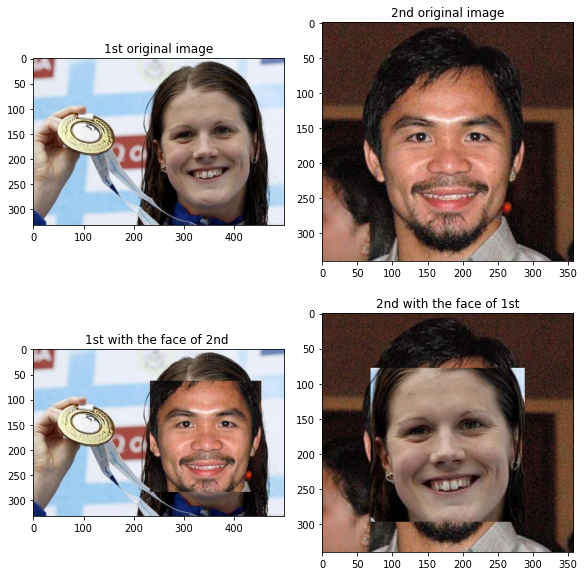

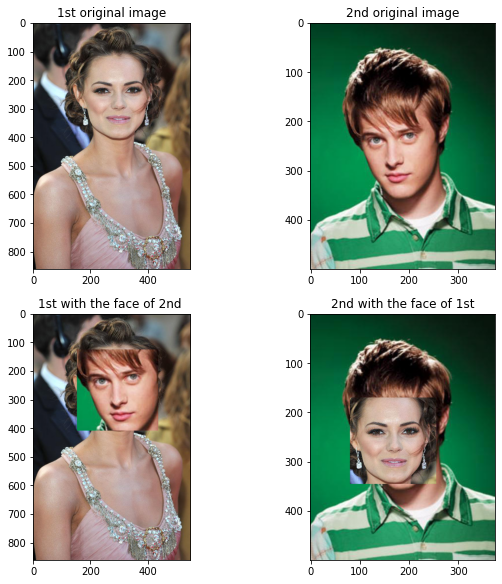

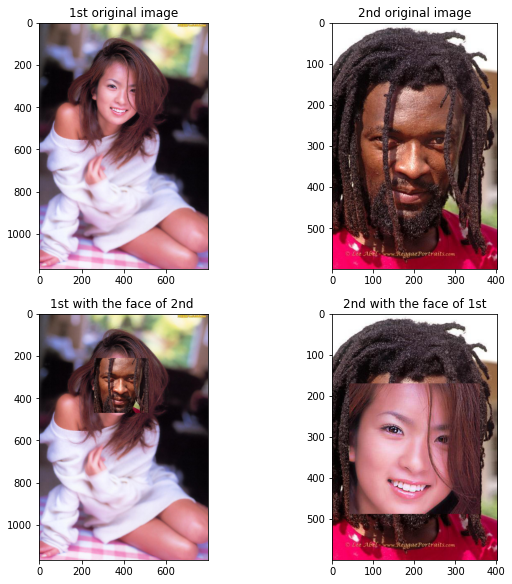

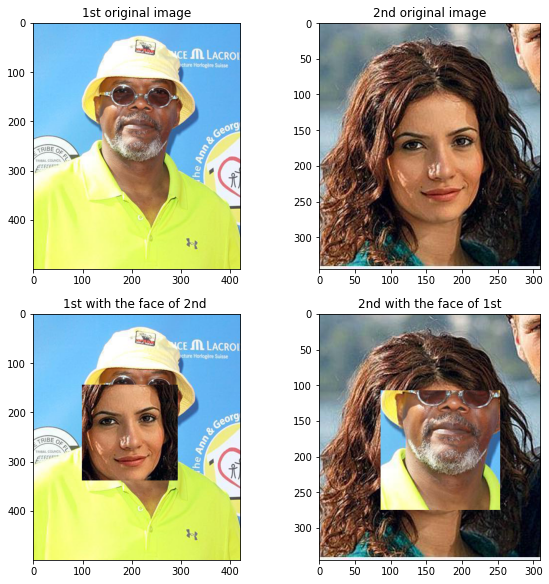

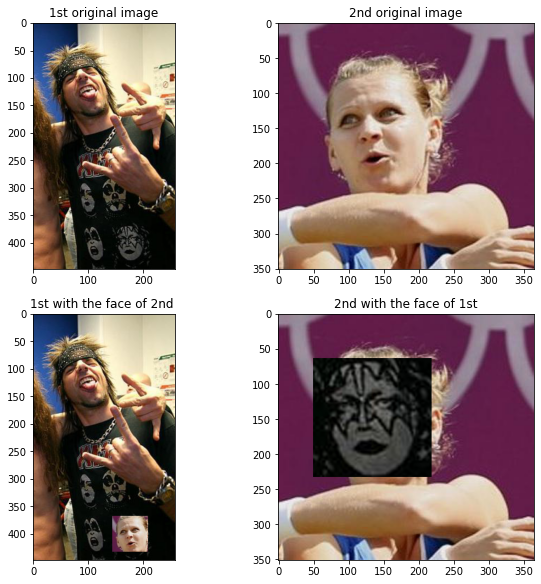

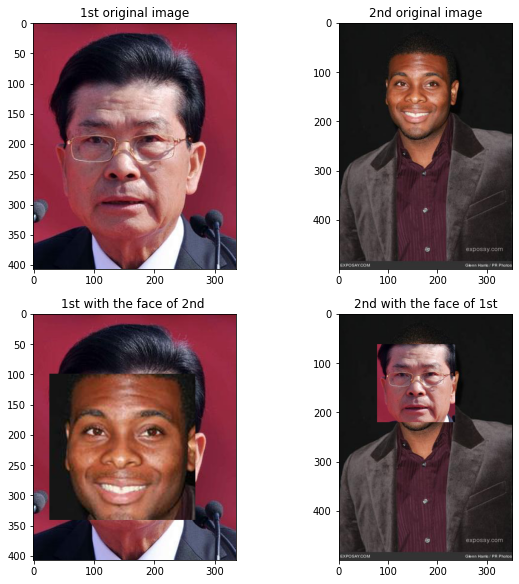

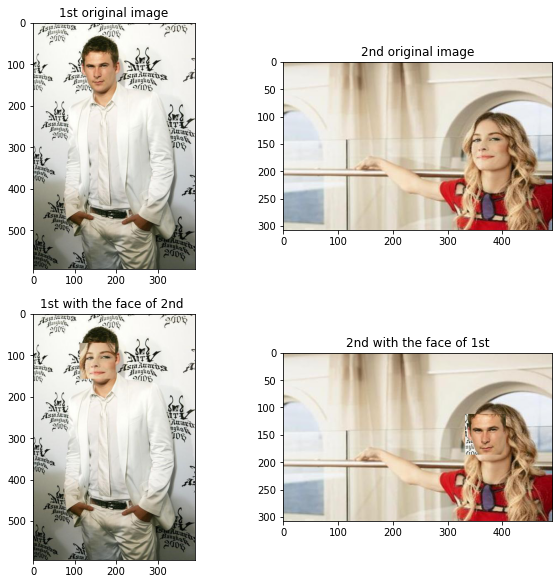

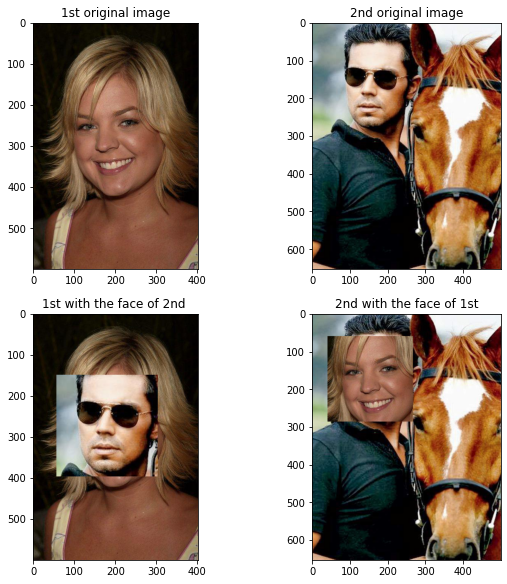

In [87]:
#plot results

counter = 8 #the nubmers of examples we want to see
while counter>0:
  images = [images_list[random.randint(0,299)], images_list[random.randint(0,299)]]
  success , swapped_images = swap_faces(*images)
  if success!=False:    
    counter-=1
    fig, ax = plt.subplots(2, 2,constrained_layout=True, figsize=(8,8))
    ax[0, 0].imshow(images[0])
    ax[0, 0].set_title("1st original image")
    ax[0, 1].imshow(images[1])
    ax[0, 1].set_title("2nd original image") 
    ax[1, 0].imshow(swapped_images[0])
    ax[1, 0].set_title("1st with the face of 2nd ")
    ax[1, 1].imshow(swapped_images[1])
    ax[1, 1].set_title("2nd with the face of 1st")
    plt.show()
    
  else:
    #didnt find face in one of the images (or found more than 1 face)
    continue
